In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# data: PC and spec data
data = pd.DataFrame([[6000, '4GB', '128GB', 3],
                     [6000, '8GB', '512GB', 9],
                     [8000, '4GB', '512GB', 5],
                     [8000, '8GB', '128GB', 7],
                     [6000, '4GB', '128GB', 4]],
                    columns=['price', 'memory', 'storage', 'score'])
data.head()

,price,memory,storage,score
0,6000,4GB,128GB,3
1,6000,8GB,512GB,9
2,8000,4GB,512GB,5
3,8000,8GB,128GB,7
4,6000,4GB,128GB,4


In [ ]:
X = data[[col for col in data.columns if col != 'score']]
y = data['score']

In [ ]:
X.head()

,price,memory,storage
0,6000,4GB,128GB
1,6000,8GB,512GB
2,8000,4GB,512GB
3,8000,8GB,128GB
4,6000,4GB,128GB


In [ ]:
X_dum = pd.get_dummies(X, columns=X.columns)
X_dum.head()

,price_6000,price_8000,memory_4GB,memory_8GB,storage_128GB,storage_512GB
0,1,0,1,0,1,0
1,1,0,0,1,0,1
2,0,1,1,0,0,1
3,0,1,0,1,1,0
4,1,0,1,0,1,0


In [ ]:
model = sm.OLS(y, sm.add_constant(X_dum))
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     15.13
Date:                Thu, 23 Jun 2022   Prob (F-statistic):              0.186
Time:                        09:16:10   Log-Likelihood:                -1.3382
No. Observations:                   5   AIC:                             10.68
Df Residuals:                       1   BIC:                             9.114
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4500      0.132     18.520      0.034       0.769       4.131
price_6000        1.3500      0.328      4.117      0.152      -2.816       5.516
price_8000        1.1000      0.346      3.175      0.194      -3.302       5.502
memory_4GB       -0.6500      0.328     -1.982      0.297      -4.816       3.516
memory_8GB        3.1000      0.346      8.949      0.071      -1.302       7.502
storage_128GB     0.3500      0.328      1.067      0.479      -3.816       4.516
storage_512GB     2.1000      0.346      6.062      0.104      -2.302       6.502
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.052
Skew:                          -0.000   Prob(JB):                        0.974
Kurtosis:                       2.500   Cond. No.                     2.06e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The smallest eigenvalue is 3.05e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
data_res = pd.DataFrame({'name': result.params.keys(),
                         'weight': result.params.values,
                         'p_val': result.pvalues})
data_res = data_res[1:]
data_res

,name,weight,p_val
price_6000,price_6000,1.35,0.151678
price_8000,price_8000,1.10,0.194224
memory_4GB,memory_4GB,-0.65,0.297414
memory_8GB,memory_8GB,3.10,0.070845
storage_128GB,storage_128GB,0.35,0.479226
storage_512GB,storage_512GB,2.10,0.104078


In [ ]:
# ・ If the significance level is 5%, it can be seen that all the factors are not statistically significant.
data_res = data_res.sort_values(by='weight')
data_res

,name,weight,p_val
memory_4GB,memory_4GB,-0.65,0.297414
storage_128GB,storage_128GB,0.35,0.479226
price_8000,price_8000,1.10,0.194224
price_6000,price_6000,1.35,0.151678
storage_512GB,storage_512GB,2.10,0.104078
memory_8GB,memory_8GB,3.10,0.070845


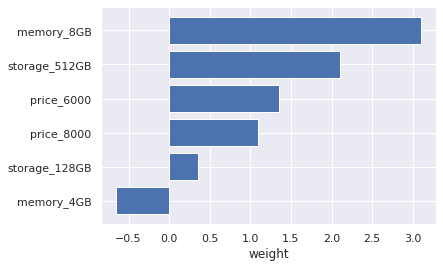

In [ ]:
sns.set()

xbar = np.arange(len(data_res['weight']))
plt.barh(xbar, data_res['weight'])
plt.yticks(xbar, labels=data_res['name'])
plt.xlabel('weight')
plt.show()

In [ ]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy.contrasts import Sum

In [ ]:
# Load data

d = """flavor	price	weight	fat_free	sodium_free	gluten_free	organic	multipack	ranking
"cheese_onion"	"1.00"	"100g"	"NO"	"NO"	"NO"	"NO"	"NO"	11
"salt_vinegar"	"3.00"	"100g"	"NO"	"YES"	"YES"	"YES"	"NO"	12
"chicken_flavored"	"4.00"	"200g"	"NO"	"NO"	"NO"	"YES"	"NO"	9
"salt_vinegar"	"4.00"	"400g"	"YES"	"YES"	"NO"	"NO"	"NO"	2
"salt_vinegar"	"2.00"	"300g"	"NO"	"NO"	"NO"	"YES"	"YES"	8
"salt_vinegar"	"1.00"	"200g"	"YES"	"NO"	"YES"	"NO"	"YES"	13
"chicken_flavored"	"3.00"	"300g"	"YES"	"NO"	"YES"	"NO"	"NO"	7
"cheese_onion"	"4.00"	"300g"	"NO"	"YES"	"YES"	"NO"	"YES"	4
"cheese_onion"	"2.00"	"400g"	"YES"	"NO"	"YES"	"YES"	"NO"	5
"tomato_ketchup"	"4.00"	"100g"	"YES"	"NO"	"YES"	"YES"	"YES"	16
"chicken_flavored"	"1.00"	"400g"	"NO"	"YES"	"YES"	"YES"	"YES"	3
"tomato_ketchup"	"2.00"	"200g"	"NO"	"YES"	"YES"	"NO"	"NO"	6
"tomato_ketchup"	"1.00"	"300g"	"YES"	"YES"	"NO"	"YES"	"NO"	10
"chicken_flavored"	"2.00"	"100g"	"YES"	"YES"	"NO"	"NO"	"YES"	15
"tomato_ketchup"	"3.00"	"400g"	"NO"	"NO"	"NO"	"NO"	"YES"	1
"cheese_onion"	"3.00"	"200g"	"YES"	"YES"	"NO"	"YES"	"YES"	14"""

conjoint_dat = pd.DataFrame([di.replace('"','').split('\t') for di in d.split('\n')])
conjoint_dat.columns = conjoint_dat.loc[0]
conjoint_dat = conjoint_dat[1:]
conjoint_dat

,flavor,price,weight,fat_free,sodium_free,gluten_free,organic,multipack,ranking
1,cheese_onion,1.00,100g,NO,NO,NO,NO,NO,11
2,salt_vinegar,3.00,100g,NO,YES,YES,YES,NO,12
3,chicken_flavored,4.00,200g,NO,NO,NO,YES,NO,9
4,salt_vinegar,4.00,400g,YES,YES,NO,NO,NO,2
5,salt_vinegar,2.00,300g,NO,NO,NO,YES,YES,8
6,salt_vinegar,1.00,200g,YES,NO,YES,NO,YES,13
7,chicken_flavored,3.00,300g,YES,NO,YES,NO,NO,7
8,cheese_onion,4.00,300g,NO,YES,YES,NO,YES,4
9,cheese_onion,2.00,400g,YES,NO,YES,YES,NO,5
10,tomato_ketchup,4.00,100g,YES,NO,YES,YES,YES,16


In [ ]:
conjoint_dat_dum = pd.get_dummies(conjoint_dat.iloc[:,:-1], columns=conjoint_dat.iloc[:,:-1].columns)
conjoint_dat_dum.head()

,flavor_cheese_onion,flavor_chicken_flavored,flavor_salt_vinegar,flavor_tomato_ketchup,price_1.00,price_2.00,price_3.00,price_4.00,weight_100g,weight_200g,...,fat_free_NO,fat_free_YES,sodium_free_NO,sodium_free_YES,gluten_free_NO,gluten_free_YES,organic_NO,organic_YES,multipack_NO,multipack_YES
1,1,0,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,1,0
3,0,1,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,0,1,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,1,0,1,0,1,0
5,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,1


In [ ]:
# set up sum contrasts for main effects coding as needed for conjoint analysis
# using C(effect,Sum) notation within main effects model specification

main_effects_model_fit = sm.OLS(conjoint_dat['ranking'].astype(int), sm.add_constant(conjoint_dat_dum))
result = main_effects_model_fit.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ranking   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     97.07
Date:                Thu, 23 Jun 2022   Prob (F-statistic):             0.0794
Time:                        09:16:11   Log-Likelihood:                 10.568
No. Observations:                  16   AIC:                             8.864
Df Residuals:                       1   BIC:                             20.45
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.0000      0.029     68.000      0.009       1.626       2.374
flavor_cheese_onion         0.5000      0.217      2.308      0.260      -2.253       3.253
flavor_chicken_flavored     0.5000      0.217      2.308      0.260      -2.253       3.253
flavor_salt_vinegar         0.7500      0.217      3.462      0.179      -2.003       3.503
flavor_tomato_ketchup       0.2500      0.217      1.154      0.455      -2.503       3.003
price_1.00                  1.2500      0.217      5.770      0.109      -1.503       4.003
price_2.00                  0.5000      0.217      2.308      0.260      -2.253       3.253
price_3.00                  0.5000      0.217      2.308      0.260      -2.253       3.253
price_4.00                 -0.2500      0.217     -1.154      0.455      -3.003       2.503
weight_100g                 5.5000      0.217     25.389      0.025       2.747       8.253
weight_200g                 2.5000      0.217     11.540      0.055      -0.253       5.253
weight_300g                -0.7500      0.217     -3.462      0.179      -3.503       2.003
weight_400g                -5.2500      0.217    -24.235      0.026      -8.003      -2.497
fat_free_NO                -0.7500      0.126     -5.959      0.106      -2.349       0.849
fat_free_YES                2.7500      0.126     21.849      0.029       1.151       4.349
sodium_free_NO              1.2500      0.126      9.932      0.064      -0.349       2.849
sodium_free_YES             0.7500      0.126      5.959      0.106      -0.849       2.349
gluten_free_NO              1.2500      0.126      9.932      0.064      -0.349       2.849
gluten_free_YES             0.7500      0.126      5.959      0.106      -0.849       2.349
organic_NO                 -0.1250      0.126     -0.993      0.502      -1.724       1.474
organic_YES                 2.1250      0.126     16.884      0.038       0.526       3.724
multipack_NO                0.2500      0.126      1.986      0.297      -1.349       1.849
multipack_YES               1.7500      0.126     13.904      0.046       0.151       3.349
==============================================================================
Omnibus:                       30.796   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                2.667
Skew:                           0.000   Prob(JB):                        0.264
Kurtosis:                       1.000   Cond. No.                     2.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The smallest eigenvalue is 1.58e-31. This might 

In [ ]:
data_res = pd.DataFrame({'name': result.params.keys(),
                         'weight': result.params.values,
                         'p_val': result.pvalues})
data_res = data_res[1:]
data_res

,name,weight,p_val
flavor_cheese_onion,flavor_cheese_onion,0.500,0.260281
flavor_chicken_flavored,flavor_chicken_flavored,0.500,0.260281
flavor_salt_vinegar,flavor_salt_vinegar,0.750,0.179010
flavor_tomato_ketchup,flavor_tomato_ketchup,0.250,0.454553
price_1.00,price_1.00,1.250,0.109244
price_2.00,price_2.00,0.500,0.260281
price_3.00,price_3.00,0.500,0.260281
price_4.00,price_4.00,-0.250,0.454553
weight_100g,weight_100g,5.500,0.025062
weight_200g,weight_200g,2.500,0.055027


In [ ]:
# ・ If the significance level is 5%, it can be seen that all the factors are not statistically significant.
# data_res['abs_weight'] = np.abs(data_res['weight'])
data_res = data_res.sort_values(by='weight')
data_res

,name,weight,p_val
weight_400g,weight_400g,-5.250,0.026254
fat_free_NO,fat_free_NO,-0.750,0.105849
weight_300g,weight_300g,-0.750,0.179010
price_4.00,price_4.00,-0.250,0.454553
organic_NO,organic_NO,-0.125,0.502188
flavor_tomato_ketchup,flavor_tomato_ketchup,0.250,0.454553
multipack_NO,multipack_NO,0.250,0.296921
flavor_cheese_onion,flavor_cheese_onion,0.500,0.260281
price_2.00,price_2.00,0.500,0.260281
price_3.00,price_3.00,0.500,0.260281


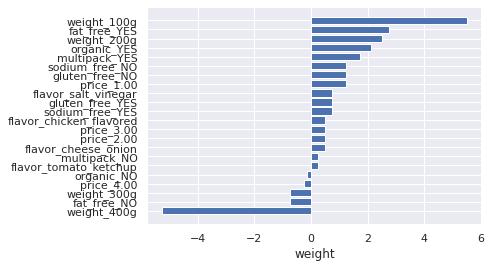

In [ ]:
xbar = np.arange(len(data_res['weight']))
plt.barh(xbar, data_res['weight'])
plt.yticks(xbar, labels=data_res['name'])
plt.xlabel('weight')
plt.show()

In [ ]:
# Train a predictor to test the performance of new products

# After going through the above EDA we will develop some predictive models and compare them.
from sklearn.preprocessing import StandardScaler

# We will use the data frame where we had created dummy variables scaling all the variables to a range of 0 to 1
X = conjoint_dat_dum
y = conjoint_dat['ranking'].astype(int)
# The target variable will be normalized from a ranking to a 1 to 10 score
y = y.apply(lambda x: int(x/len(y)*10))

features = X.columns.values
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
X.head()

,flavor_cheese_onion,flavor_chicken_flavored,flavor_salt_vinegar,flavor_tomato_ketchup,price_1.00,price_2.00,price_3.00,price_4.00,weight_100g,weight_200g,...,fat_free_NO,fat_free_YES,sodium_free_NO,sodium_free_YES,gluten_free_NO,gluten_free_YES,organic_NO,organic_YES,multipack_NO,multipack_YES
0,1.732051,-0.577350,-0.577350,-0.57735,1.732051,-0.577350,-0.577350,-0.577350,1.732051,-0.577350,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
1,-0.577350,-0.577350,1.732051,-0.57735,-0.577350,-0.577350,1.732051,-0.577350,1.732051,-0.577350,...,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0
2,-0.577350,1.732051,-0.577350,-0.57735,-0.577350,-0.577350,-0.577350,1.732051,-0.577350,1.732051,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
3,-0.577350,-0.577350,1.732051,-0.57735,-0.577350,-0.577350,-0.577350,1.732051,-0.577350,-0.577350,...,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
4,-0.577350,-0.577350,1.732051,-0.57735,-0.577350,1.732051,-0.577350,-0.577350,-0.577350,-0.577350,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0


In [ ]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

# Running logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
# Print the prediction accuracy
print(metrics.mean_squared_error(y_test, prediction_test))

10.125


AxesSubplot(0.125,0.125;0.775x0.755)


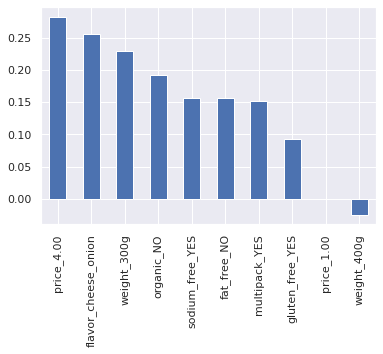

In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print(weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


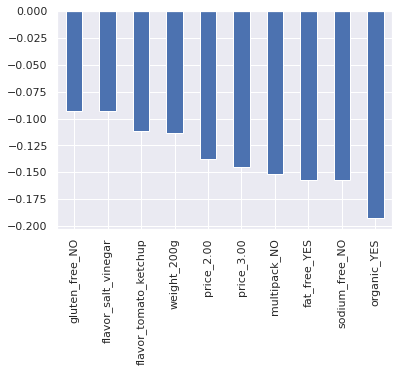

In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print(metrics.mean_squared_error(y_test, prediction_test))

10.125


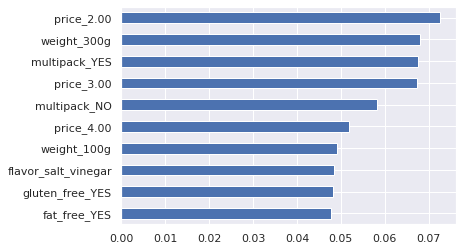

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.mean_squared_error(y_test, preds)

17.5